In [6]:
import os

# Rename the file to a simpler name
os.rename("/content/archive (1).zip", "/content/fish_disease.zip")


FileNotFoundError: [Errno 2] No such file or directory: '/content/archive (1).zip' -> '/content/fish_disease.zip'

In [ ]:
import zipfile

with zipfile.ZipFile("/content/fish_disease.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/fish_disease_data")

print("Dataset extracted to /content/fish_disease_data")


In [47]:
import os

print(os.listdir("/content/fish_disease_data/Fish Disease Dataset"))


['InfectedFish', 'FreshFish']


In [48]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [49]:
import os

def find_Class(directory_path):
    """
    Returns a list of folder names (classes) inside the given directory.

    Args:
        directory_path (str): Path to the dataset root directory.

    Returns:
        list: List of subdirectory names (classes).
    """
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")

    # Get all entries and filter out directories (classes)
    folders = [
        entry for entry in os.listdir(directory_path)
        if os.path.isdir(os.path.join(directory_path, entry))
    ]

    return folders

# ✅ Example usage in Google Colab
dataset_path = "/content/fish_disease_data/Fish Disease Dataset"
class_names = find_Class(dataset_path)

print("Classes found:", class_names)


Classes found: ['InfectedFish', 'FreshFish']


In [50]:
# Define dataset directory (adjust this path to your actual dataset location in Colab)
DIRECTORY = "/content/fish_disease_data/Fish Disease Dataset"  # Update if needed

CATEGORIES = []

try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATEGORIES.append(folder)
except ValueError as e:
    print(e)

print("Categories found:", CATEGORIES)


Directories in '/content/fish_disease_data/Fish Disease Dataset':
Categories found: ['InfectedFish', 'FreshFish']


In [51]:
for category in CATEGORIES:  # Use same variable name consistently
    folder = os.path.join(DIRECTORY, category)
    print(f"Folder path: {folder}")

    label = CATEGORIES.index(category)
    print(f"Label for '{category}': {label}")


Folder path: /content/fish_disease_data/Fish Disease Dataset/InfectedFish
Label for 'InfectedFish': 0
Folder path: /content/fish_disease_data/Fish Disease Dataset/FreshFish
Label for 'FreshFish': 1


In [52]:
data = []
image_size = 128

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img_arr = cv2.imread(img_path)

        if img_arr is not None:
            # Convert BGR to RGB
            img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            img_arr = cv2.resize(img_arr, (image_size, image_size))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img_path}")

# Shuffle the dataset
import random
random.shuffle(data)

# Separate features and labels
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

import numpy as np
X = np.array(X) / 255.0  # Normalize pixel values to [0,1]
y = np.array(y)

print(f"Loaded {len(X)} images.")


Loaded 305 images.


In [53]:
for i in range (0,10):
    print(data[i][1])

1
0
1
1
1
0
0
1
1
0


In [54]:
random.shuffle(data)

In [55]:
for i in range (0,10):
    print(data[i][1])

1
0
0
1
1
0
0
0
0
1


In [56]:
x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)

In [57]:
X= np.array(x)
Y=np.array(y)

In [58]:
X=X/255
# X

In [59]:
print(X.shape)
print(Y.shape)

(305, 128, 128, 3)
(305,)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42)

In [61]:
print(X_train.shape)
print(y_train.shape)

(274, 128, 128, 3)
(274,)


In [62]:
print(X_test.shape)
print(y_test.shape)

(31, 128, 128, 3)
(31,)


In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [64]:
model=Sequential()
model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(2,activation='softmax'))

In [65]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │        12,546 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,050 (164.26 KB)

 Trainable params: 42,050 (164.26 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
no_of_epochs=50
model_history=model.fit(X_train,y_train,epochs=no_of_epochs,validation_split=0.15)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.5693 - loss: 0.6887 - val_accuracy: 0.5952 - val_loss: 0.6392
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5876 - loss: 0.6853 - val_accuracy: 0.8333 - val_loss: 0.5885
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6620 - loss: 0.6122 - val_accuracy: 0.4048 - val_loss: 0.8218
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5495 - loss: 0.6733 - val_accuracy: 0.8571 - val_loss: 0.5710
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8350 - loss: 0.5068 - val_accuracy: 0.8095 - val_loss: 0.4291
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7675 - loss: 0.4567 - val_accuracy: 0.7857 - val_loss: 0.4423
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8528 - loss: 0.3446 - val_accuracy: 0.7381 - val_loss: 0.4814
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8509 - loss: 0.3332 - val_accuracy: 0.9048 - val_loss: 0.2769

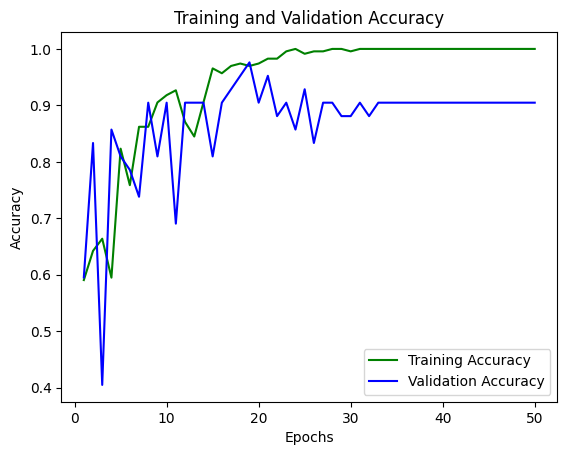

In [68]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoachs = range(1,no_of_epochs+1)
plt.plot(epoachs,train_acc,'g',label='Training Accuracy')
plt.plot(epoachs,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

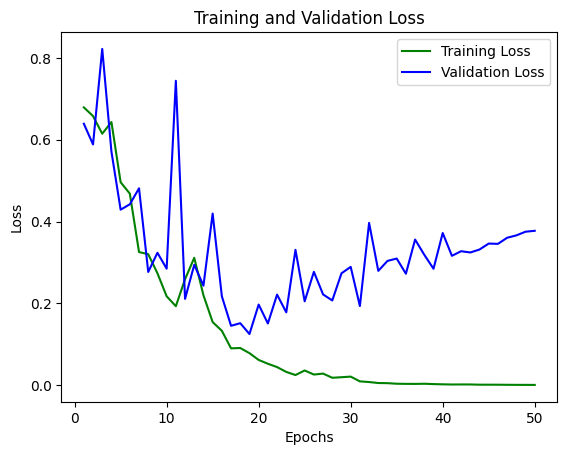

In [69]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,no_of_epochs+1)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [70]:
model.save('NTD_1.h5')

In [71]:
from keras.preprocessing import image
import numpy as np

img_path = "/content/fish_disease_data/Fish Disease Dataset/FreshFish/aug_0_1014.png"
img_pred = image.load_img(img_path, target_size=(image_size, image_size))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred / 255.0  # normalize

result = model.predict(img_pred)

print(result)
print(CATEGORIES[np.argmax(result)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
[[5.8802136e-04 9.9941194e-01]]
FreshFish


In [72]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [73]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0])

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred, target_names=CATEGORIES))
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

InfectedFish       0.93      1.00      0.97        14
   FreshFish       1.00      0.94      0.97        17

    accuracy                           0.97        31
   macro avg       0.97      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31

[[14  0]
 [ 1 16]]
Test accuracy: 0.97


In [75]:
model.evaluate(X_test,y_test, verbose = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.9677 - loss: 0.1495


[0.14948613941669464, 0.9677419066429138]